In [101]:
import pandas as pd
import string as st
import math
import matplotlib
import numpy as np
#from datascience import *

%matplotlib inline
import matplotlib.pyplot as plt

In [163]:
# load dataset as pandas df
data_file = '../data/180213_cogsci_journal_unprocessed.csv'

df_pd = pd.read_csv(data_file)

# fix the article index column name
df_pd.rename(columns={"Unnamed: 0": "Article Index"}, inplace=True)

# NOTE:
# don't fill the column with garbage data, just remove it
#df_pd = df_pd.fillna("Other") 

# drop all rows where 'article_name' is nan
df_pd = df_pd.dropna(how='all', subset=['article_name'])
# need to realign indices to start at 0
df_pd.index=range(len(df_pd.index))

In [164]:
affiliations = df_pd["author_affiliations"].str.lower()
columns=['Neuro_Science','Psychology','Philosophy','Anthropology','Linguistics','Artificial Intelligence', 'CS', 'CogSci', 'Other', 'Missing', 'Total']
# hexaCount=pd.DataFrame(0, index=np.arange(len(affiliations)), columns=columns)

aff_df = df_pd["author_affiliations"].str.lower()
affiliations = affiliations.tolist()
#aff_df[]
#df_pd["author_affiliations"]
#print(type(hexaCount[1]))
#hexaCount

In [165]:
art_types = '../data/Article_Types_V1.csv'

df_art_types = pd.read_csv(art_types, sep=',', header= None)


In [166]:
df_art_types # 9 rows 5 columns

,0,1,2,3,4
0,Extended_Article,Extended Articles,Extended Article,Extended article,Extended articles
1,Original_Article,Original Article,Original Articles,NaN,NaN
2,Regular_Article,Regular Articles,Regular articles,Regular Article,Regular article
3,Letter_to_Editor,Letters to the Editor,Letter to the Editor,NaN,NaN
4,Brief_Report,Brief Reports,Brief Report,Brief reports,Brief report
5,Announcement,Announcement,NaN,NaN,NaN
6,Special,2011 Rumelhart Prize Special Issue Honoring Judea Pearl,SPECIAL ISSUE: 2009 Rumelhart Prize Special Issue Honoring Susan Carey,2010 Rumelhart Prize Special Issue Honoring James L. McClelland,SPECIAL ISSUE: 2007 Rumelhart Prize Special Issue Honoring Jeffrey L. Elman Language as a Dynamical System
7,Comment,Comment,Short Communication,NaN,NaN
8,Commentary,Commentary,NaN,NaN,NaN


In [167]:

lst=[[] for _ in range(len(df_art_types))] # makes a list of lists where each sublist is an article type. elem 0 is name, rest elements

for i in range(df_art_types.shape[1]):
        for j in range(df_art_types.shape[0]):
            lst[j].append(df_art_types[i][j])
lst



[['Extended_Article',
  'Extended Articles',
  'Extended Article',
  'Extended article',
  'Extended articles'],
 ['Original_Article', 'Original Article', 'Original Articles', nan, nan],
 ['Regular_Article',
  'Regular Articles',
  'Regular articles',
  'Regular Article',
  'Regular article'],
 ['Letter_to_Editor',
  'Letters to the Editor',
  'Letter to the Editor',
  nan,
  nan],
 ['Brief_Report',
  'Brief Reports',
  'Brief Report',
  'Brief reports',
  'Brief report'],
 ['Announcement', 'Announcement', nan, nan, nan],
 ['Special',
  '2011 Rumelhart Prize Special Issue Honoring Judea Pearl',
  'SPECIAL ISSUE: 2009 Rumelhart Prize Special Issue Honoring Susan Carey',
  '2010 Rumelhart Prize Special Issue Honoring James L. McClelland',
  'SPECIAL ISSUE: 2007 Rumelhart Prize Special Issue Honoring Jeffrey L. Elman Language as a Dynamical System'],
 ['Comment', 'Comment', 'Short Communication', nan, nan],
 ['Commentary', 'Commentary', nan, nan, nan]]

In [168]:
type(lst[1][3])

float

In [169]:
for a in range(len(lst)):
    lst[a] = [x for x in lst[a] if str(x) != 'nan']
lst

[['Extended_Article',
  'Extended Articles',
  'Extended Article',
  'Extended article',
  'Extended articles'],
 ['Original_Article', 'Original Article', 'Original Articles'],
 ['Regular_Article',
  'Regular Articles',
  'Regular articles',
  'Regular Article',
  'Regular article'],
 ['Letter_to_Editor', 'Letters to the Editor', 'Letter to the Editor'],
 ['Brief_Report',
  'Brief Reports',
  'Brief Report',
  'Brief reports',
  'Brief report'],
 ['Announcement', 'Announcement'],
 ['Special',
  '2011 Rumelhart Prize Special Issue Honoring Judea Pearl',
  'SPECIAL ISSUE: 2009 Rumelhart Prize Special Issue Honoring Susan Carey',
  '2010 Rumelhart Prize Special Issue Honoring James L. McClelland',
  'SPECIAL ISSUE: 2007 Rumelhart Prize Special Issue Honoring Jeffrey L. Elman Language as a Dynamical System'],
 ['Comment', 'Comment', 'Short Communication'],
 ['Commentary', 'Commentary']]

In [174]:
newTypes = []
def ConsolidateType(lst,df_pd):

    oldTypes = df_pd.article_type.values
      
    for i in range(len(oldTypes)):
        # NOTE: index 0 of each sublist of lst is the name of that publication type, not a filter
        
        for j in range(len(lst)):
            
            if oldTypes[i] in lst[j][1:]:
                newTypes.append(lst[j][0])
                break
            elif j == range(len(lst)):
                newTypes.append(np.nan)
                break
                
#           if oldTypes[i] in lst[0][1:]:
#             newTypes.append(lst[0][0])
        
#         #Original_Article
#         elif oldTypes[i] in lst[1][1:]:
#             newTypes.append(lst[1][0])
            
#         #Regular_Article
#         elif oldTypes[i] in lst[2][1:]:
#             newTypes.append(lst[2][0])
            
#         #Letter_to_Editor
#         elif oldTypes[i] in lst[3][1:]:
#             newTypes.append(lst[3][0])
        
#         #Brief Report
#         elif oldTypes[i] in lst[4][1:]:
#             newTypes.append(lst[4][0])
        
#         #Announcement
#         elif oldTypes[i] in lst[5][1:]:
#             newTypes.append(lst[5][0])
        
#         #Special
#         elif oldTypes[i] in lst[6][1:]:
#             newTypes.append(lst[6][0])
            
#         #Comment    
#         elif oldTypes[i] in lst[2][1:]:
#             newTypes.append(lst[2][0])
            
#         #Commentary
#         elif oldTypes[i] in lst[2][1:]:
#             newTypes.append(lst[2][0])
            
        
    df_pd.article_type = newTypes

In [175]:
print(len(df_pd.article_type.values))

1644


In [176]:
ConsolidateType(lst,df_pd)

ValueError: Length of values does not match length of index

In [177]:
print(len(newTypes))

1423


In [46]:
df_pd = df_pd.dropna(how='any', subset=['article_type'])

(1435, 26)

In [52]:
df_pd.to_csv("../data/Consolidated_Types")

In [53]:
def department_count (aff_df, columns):
    # needs two inputs: the affiliation list (aff_df), and column names (colums)
    
    # initialize empty hexacount df
    hexaCount=pd.DataFrame(0, index=np.arange(len(aff_df)), columns=columns)
    
    # loop through
    for i in range(len(aff_df)):
        # ideally, we want to also move this categories to an external datafile
        if pd.isnull(aff_df.iloc[i]):
            # checking if the affiliation is just empty
            hexaCount['Missing'].iloc[i] =1
        
        else:
            # not NaN, proceed to hexagonize
            if "anthropology" in aff_df.iloc[i]:
                hexaCount["Anthropology"].iloc[i] += 1

            if "artificial intelligence" in aff_df.iloc[i]:
                hexaCount["Artificial Intelligence"].iloc[i] += 1    

            if "linguistic" in aff_df.iloc[i]:
                hexaCount["Linguistics"].iloc[i] += 1

            if "neuro science" in aff_df.iloc[i] or "neuroscience" in aff_df.iloc[i]:
                hexaCount["Neuro_Science"].iloc[i] += 1

            if "philosophy" in aff_df.iloc[i]:
                hexaCount["Philosophy"].iloc[i] += 1

            if "psychology" in aff_df.iloc[i]:
                hexaCount["Psychology"].iloc[i] += 1
            
            if "computer" in aff_df.iloc[i]:
                hexaCount["CS"].iloc[i] += 1

            if "cognitive science" in aff_df.iloc[i]:
                hexaCount["CogSci"].iloc[i] += 1
                
            if hexaCount.iloc[i].sum()<1.:            
                hexaCount["Other"].iloc[i] = 1
    
            hexaCount["Total"].iloc[i] = hexaCount.iloc[i].sum()

    return hexaCount

In [54]:
# building the hexagon
hexaCount = department_count(aff_df, columns)

### Check to see which affiliations got filed under which category

In [55]:
hexaCount.iloc[759]

Neuro_Science              0
Psychology                 1
Philosophy                 0
Anthropology               1
Linguistics                1
Artificial Intelligence    0
CS                         0
CogSci                     0
Other                      0
Missing                    0
Total                      3
Name: 759, dtype: int64

In [56]:
pd.options.display.max_colwidth = 200
print(columns)
query_hex = columns[3]
cols_to_disp=['author_affiliations']
print('Querying:', query_hex, '\n---\n')
print(df_pd[cols_to_disp].loc[hexaCount[query_hex]==1].to_string())

['Neuro_Science', 'Psychology', 'Philosophy', 'Anthropology', 'Linguistics', 'Artificial Intelligence', 'CS', 'CogSci', 'Other', 'Missing', 'Total']
Querying: Anthropology 
---

                                                                                                                                                                                          author_affiliations
78                                                                                                                                            Department of Anthropology, University of California, San Diego
489                                                                                                                                                        Max Planck Institute for Evolutionary Anthropology
491                                                                                                                                                        Max-Planck-Institute for Evolutionary Anthropolog

### Append hexaCount to original dataframe

In [57]:
pd_concat = pd.concat([df_pd, hexaCount], axis=1)

In [58]:
pd_concat

,article_index,article_name,year,volume,issue,pages,month,doi,article_type,authors,...,Psychology,Philosophy,Anthropology,Linguistics,Artificial Intelligence,CS,CogSci,Other,Missing,Total
0,2.0,Why Cognitive Science,1977.0,1.0,1,1-2,January,10.1207/s15516709cog0101_1,Original_Article,Allan Collins,...,0,0,0,0,0,0,0,0,1,0
1,3.0,"An Overview of KRL, a Knowledge Representation Language",1977.0,1.0,1,3-46,January,10.1207/s15516709cog0101_2,Original_Article,"Daniel G. Bobrow1,* and\nTerry Winograd2",...,0,0,0,0,0,0,0,1,0,1
2,4.0,Human and Computational Question Answering†,1977.0,1.0,1,47-73,January,10.1207/s15516709cog0101_3,Original_Article,Wendy Lehnert*,...,0,0,0,0,0,0,0,1,0,1
3,5.0,Definite Descriptions and Semantic Memory†,1977.0,1.0,1,74-83,January,10.1207/s15516709cog0101_4,Original_Article,Andrew Ortony* and\nRichard C. Anderson,...,0,0,0,0,0,0,0,1,0,1
4,6.0,"Artificial Intelligence, Language, and the Study of Knowledge†‡",1977.0,1.0,1,84-123,January,10.1207/s15516709cog0101_5,Original_Article,Professor Ira Goldstein* and\nSeymour Papert,...,0,0,0,0,0,0,0,1,0,1
5,7.0,Induction of Augmented Transition Networks†,1977.0,1.0,2,125-157,April,10.1207/s15516709cog0102_1,Original_Article,John R. Anderson*,...,0,0,0,0,0,0,0,1,0,1
6,8.0,Decision Theory and Artificial Intelligence II: The Hungry Monkey†,1977.0,1.0,2,158-192,April,10.1207/s15516709cog0102_2,Original_Article,"Jerome A. Feldman1,* and\nRobert F. Sproull2",...,0,0,0,0,0,0,0,1,0,1
7,9.0,Problem Solving in Semantically Rich Domains: An Example from Engineering Thermodynamics†,1977.0,1.0,2,193-215,April,10.1207/s15516709cog0102_3,Original_Article,R. Bhaskar and\nHerbert A. Simon*,...,0,0,0,0,0,0,0,1,0,1
8,10.0,"Verbs, Time, and Modality†",1977.0,1.0,2,216-234,April,10.1207/s15516709cog0102_4,Original_Article,M. J. Steedman*,...,0,0,0,0,0,0,0,1,0,1
9,11.0,What Sort of Taxonomy of Causation Do We Need for Language Understanding?†,1977.0,1.0,3,235-264,July,10.1207/s15516709cog0103_1,Original_Article,Yorick Wilks,...,0,0,0,0,0,0,0,1,0,1


### Visualize
Now we can visualize hexagon values.

Text(0.5,1,'Sum over all years')

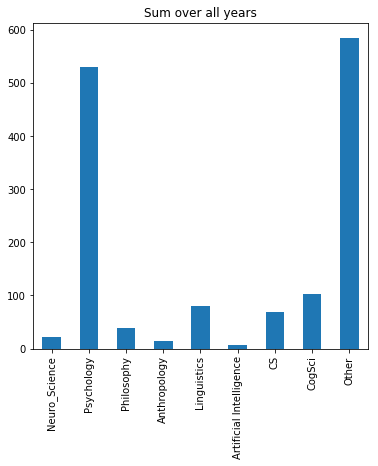

In [59]:
#pd_concat[['year'] + columns]

# plot hexagon normalized by total (0:-2 indexing to exclude columns missing and total)
hex_normed = pd_concat[columns[:-2]].div(pd_concat['Total'], axis='rows')
hex_normed.sum().plot(kind='bar', figsize=(6,6))
plt.xticks(rotation=90)
plt.title('Sum over all years')

In [60]:
hex_normed.groupby(pd_concat['year']).size()

year
1977.0     15
1978.0     17
1979.0     16
1980.0     17
1981.0     14
1982.0     11
1983.0     12
1984.0     16
1985.0     17
1986.0     17
1987.0     18
1988.0     17
1989.0     21
1990.0     20
1991.0     15
1992.0     16
1993.0     27
1994.0     15
1995.0     15
1996.0     15
1997.0     14
1998.0     15
1999.0     20
2000.0     20
2001.0     28
2002.0     27
2003.0     39
2004.0     46
2005.0     40
2006.0     42
2007.0     42
2008.0     56
2009.0     63
2010.0     68
2011.0     58
2012.0     70
2013.0     62
2014.0     65
2015.0     81
2016.0     84
2017.0    151
2018.0     13
dtype: int64

Text(0.5,1,'Hexagon normed, and proportion per year')

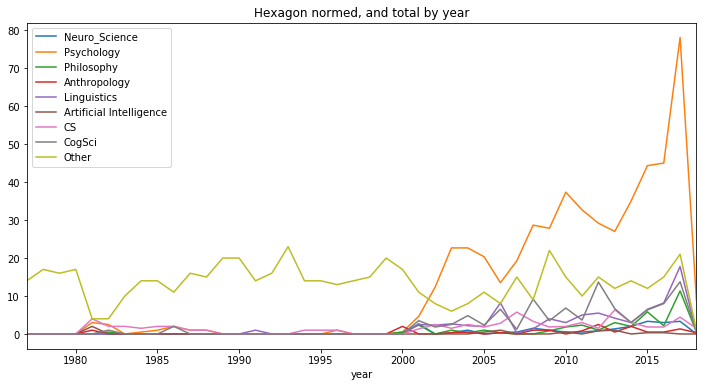

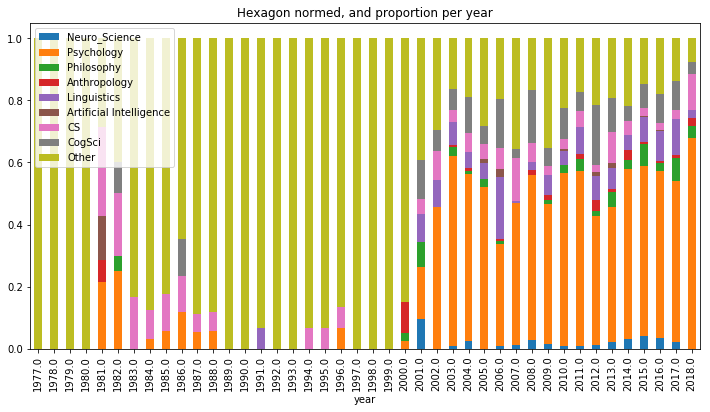

In [61]:
# this plots sum per year, which means it sums to the total # of articles written that year
hex_normed.groupby(pd_concat['year']).sum().plot(figsize=(12,6))
plt.title('Hexagon normed, and total by year')

# this plots mean per year, which means it normalizes by the number of articles written per year
#hex_normed.groupby(pd_concat['year']).mean().plot(figsize=(12,6))
hex_normed.groupby(pd_concat['year']).mean().plot(kind='bar', stacked=True, figsize=(12,6))
#plt.yscale('log')
plt.title('Hexagon normed, and proportion per year')

# pd.groupby is a function that collects rows based on some criteria, in this case, the year of the article
# you guys can figure out how to groupby decades or per 5 years